## 1.Analysing the dataset

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
df=pd.read_csv('EV.csv')

In [78]:
df.head()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000


In [79]:
df.tail()

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000
98,51,Salaried,Married,Post Graduate,2,Yes,2200000,1100000


In [80]:
df.shape

(99, 8)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB


## 2. Visualizing the Dataset

Text(0.5, 1.0, 'Age Distribution')

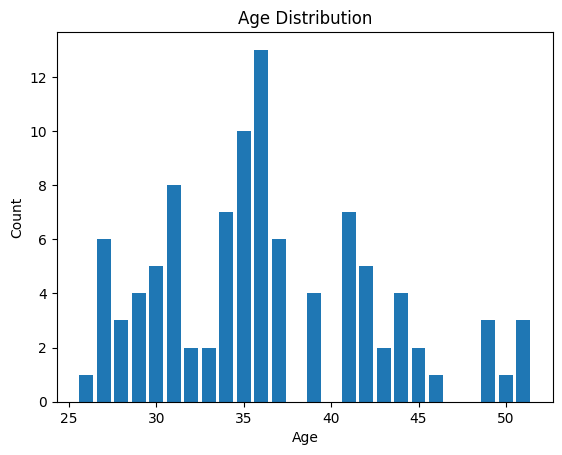

In [82]:
age_data = df['Age']

# Calculate the frequency of each age
age_counts = age_data.value_counts().sort_index()

# Create a bar plot
plt.bar(age_counts.index, age_counts.values)

# Customize the plot
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')

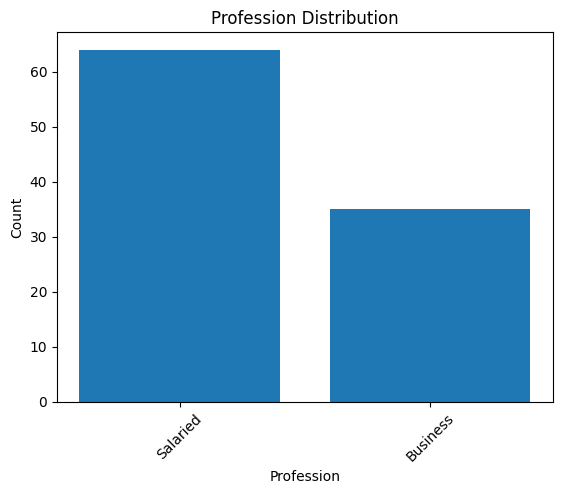

In [83]:
filtered_df = df[df['Profession'].isin(['Salaried', 'Business'])]

# Calculate the frequency of each profession
profession_counts = filtered_df['Profession'].value_counts()

# Create a bar plot
plt.bar(profession_counts.index, profession_counts.values)

# Customize the plot
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Profession Distribution')
plt.xticks(rotation=45)

# Display the plot
plt.show()

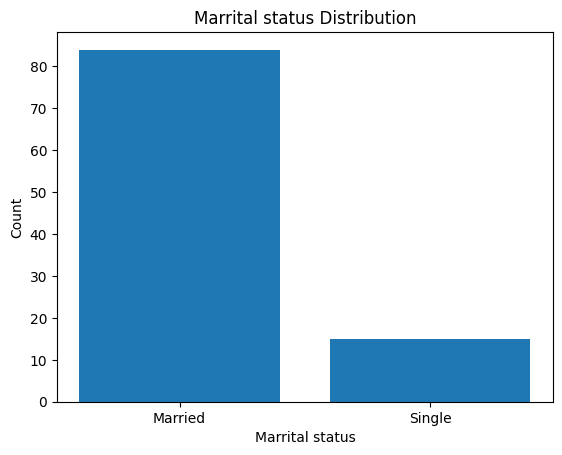

In [84]:
filtered_df = df[df['Marrital Status'].isin(['Single', 'Married'])]

# Calculate the frequency of each profession
m_count = filtered_df['Marrital Status'].value_counts()

# Create a bar plot
plt.bar(m_count.index, m_count.values)

# Customize the plot
plt.xlabel('Marrital status')
plt.ylabel('Count')
plt.title('Marrital status Distribution')
# plt.xticks(rotation=45)

# Display the plot
plt.show()

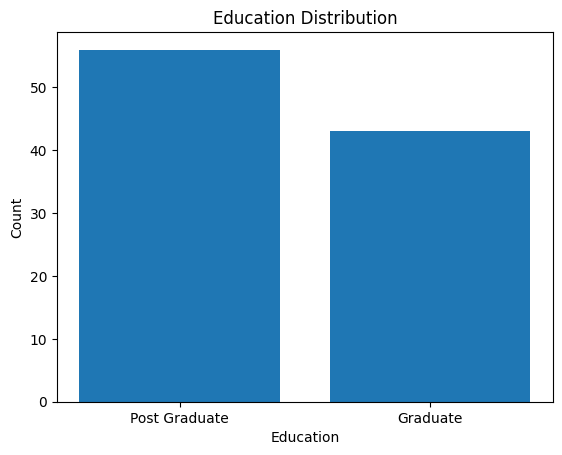

In [85]:
filtered_df = df[df['Education'].isin(['Graduate', 'Post Graduate'])]

# Calculate the frequency of each profession
m_count = filtered_df['Education'].value_counts()

# Create a bar plot
plt.bar(m_count.index, m_count.values)

# Customize the plot
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
# plt.xticks(rotation=45)

# Display the plot
plt.show()

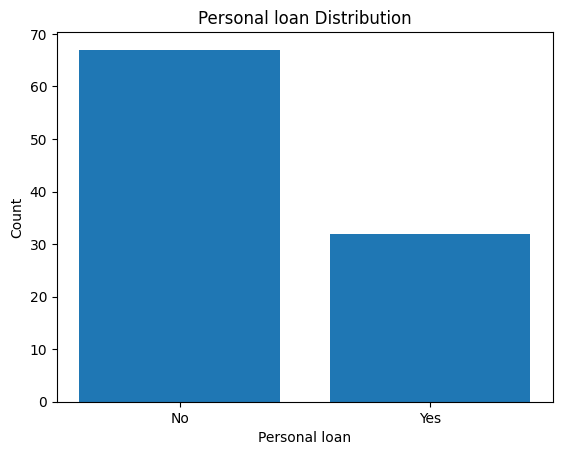

In [86]:
filtered_df = df[df['Personal loan'].isin(['Yes', 'No'])]

# Calculate the frequency of each profession
m_count = filtered_df['Personal loan'].value_counts()

# Create a bar plot
plt.bar(m_count.index, m_count.values)

# Customize the plot
plt.xlabel('Personal loan')
plt.ylabel('Count')
plt.title('Personal loan Distribution')
# plt.xticks(rotation=45)

# Display the plot
plt.show()

In [90]:
df['Profession'] = df['Profession'].replace({'Salaried': 1, 'Business': 0})
df['Marrital Status'] = df['Marrital Status'].replace({'Single': 1, 'Married': 0})
df['Education'] = df['Education'].replace({'Graduate': 1, 'Post Graduate': 0})
df['Personal loan'] = df['Personal loan'].replace({'Yes': 1, 'No': 0})
df.shape

(99, 8)

In [91]:
cor=df.corr(),
plt.figure(figsize=(10,8))
sns.heatmap(data=cor, annot=True, cmap='coolwarm')

ValueError: ignored

<Figure size 1000x800 with 0 Axes>

## 3. Performing elbow method

In [92]:
x=df.iloc[:,[4,6]].values #no of dependents and Salary
y=df.iloc[:,[4,7]].values #no of dependents and price
z=df.iloc[:,[6,7]].values #no of dependents and price

In [93]:
from sklearn.cluster import KMeans
wcss1=[]
wcss2=[]
wcss3=[]

In [94]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(x)
  wcss1.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [95]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(y)
  wcss2.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [96]:
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++', random_state=0)
  kmeans.fit(z)
  wcss3.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

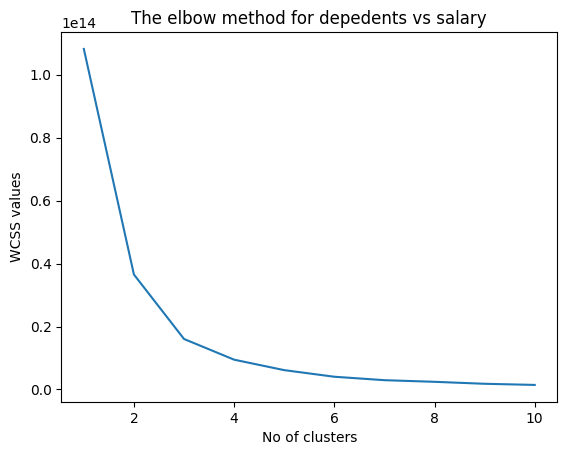

In [97]:
plt.plot(range(1,11),wcss1)
plt.title('The elbow method for depedents vs salary')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()

Sudden dip at 3

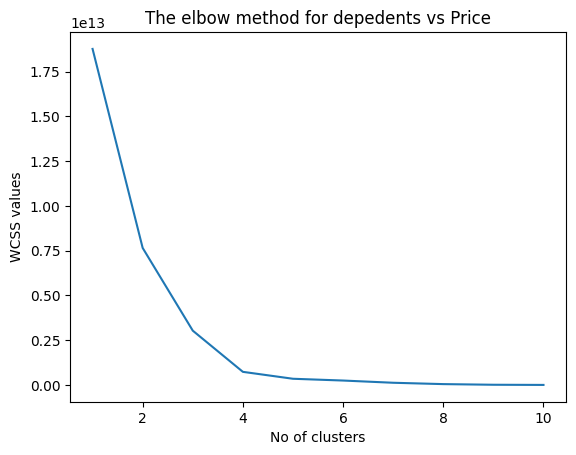

In [98]:
plt.plot(range(1,11),wcss2)
plt.title('The elbow method for depedents vs Price')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()

Dips at 4

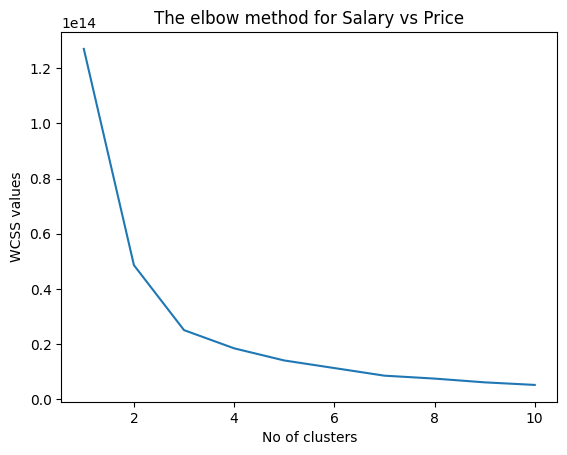

In [99]:
plt.plot(range(1,11),wcss3)
plt.title('The elbow method for Salary vs Price')
plt.xlabel('No of clusters')
plt.ylabel('WCSS values')
plt.show()

Dips at 3

## 4.K Means Clustering

In [100]:
kmeansmodel1=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeansmodel2=KMeans(n_clusters=4,init='k-means++',random_state=0)
kmeansmodel3=KMeans(n_clusters=3,init='k-means++',random_state=0)

In [101]:
x_kmeans=kmeansmodel1.fit_predict(x)
y_kmeans=kmeansmodel2.fit_predict(y)
z_kmeans=kmeansmodel3.fit_predict(z)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


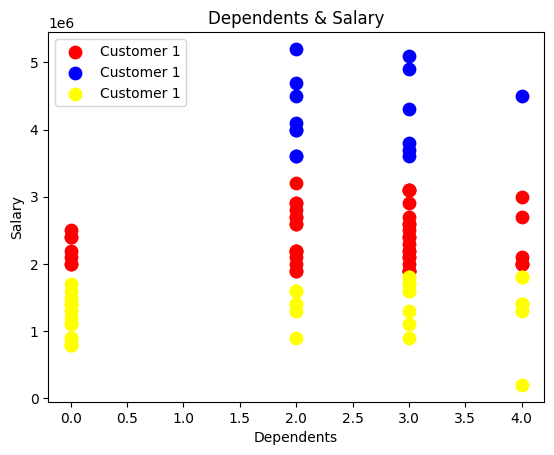

In [102]:
plt.scatter(x[x_kmeans==0,0],x[x_kmeans==0,1],s=80,c="red",label='Customer 1')
plt.scatter(x[x_kmeans==1,0],x[x_kmeans==1,1],s=80,c="blue",label='Customer 1')
plt.scatter(x[x_kmeans==2,0],x[x_kmeans==2,1],s=80,c="yellow",label='Customer 1')
plt.title('Dependents & Salary')
plt.xlabel('Dependents')
plt.ylabel('Salary')
plt.legend()
plt.show()

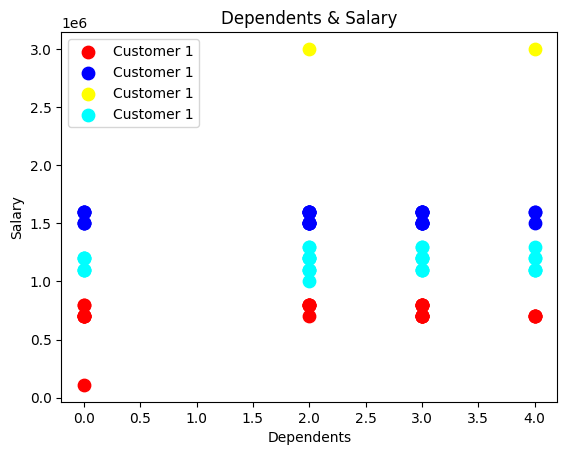

In [103]:
plt.scatter(y[y_kmeans==0, 0], y[y_kmeans==0, 1], s=80, c="red", label='Customer 1')
plt.scatter(y[y_kmeans==1, 0], y[y_kmeans==1, 1], s=80, c="blue", label='Customer 1')
plt.scatter(y[y_kmeans==2, 0], y[y_kmeans==2, 1], s=80, c="yellow", label='Customer 1')
plt.scatter(y[y_kmeans==3, 0], y[y_kmeans==3, 1], s=80, c="cyan", label='Customer 1')

plt.title('Dependents & Salary')
plt.xlabel('Dependents')
plt.ylabel('Salary')
plt.legend()
plt.show()


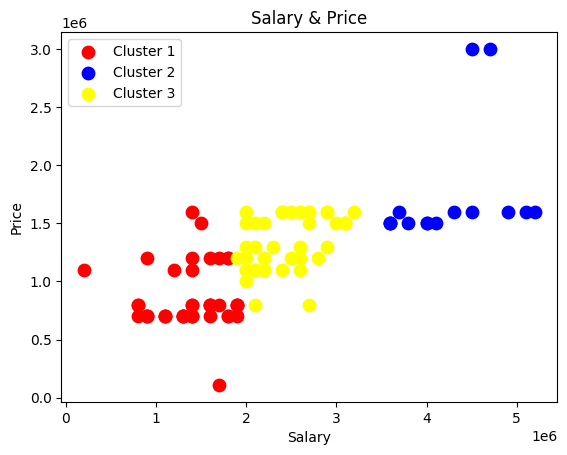

In [104]:
plt.scatter(z[z_kmeans==0, 0], z[z_kmeans==0, 1], s=80, c="red", label='Cluster 1')
plt.scatter(z[z_kmeans==1, 0], z[z_kmeans==1, 1], s=80, c="blue", label='Cluster 2')
plt.scatter(z[z_kmeans==2, 0], z[z_kmeans==2, 1], s=80, c="yellow", label='Cluster 3')
plt.title('Salary & Price')
plt.xlabel('Salary')
plt.ylabel('Price')
plt.legend()
plt.show()
